Perfect — this is a great hands-on implementation of Bayesian Optimization from scratch, using only numpy, scipy, and scikit-learn. Let’s walk through it block by block so you understand exactly what each section is doing and why.
🧩 Imports
from math import sin, pi
from numpy import arange, vstack, argmax, asarray
from numpy.random import normal, random
from scipy.stats import norm
from sklearn.gaussian_process import GaussianProcessRegressor
from warnings import catch_warnings, simplefilter
from matplotlib import pyplot
You’re importing the usual math and numerical libraries.
GaussianProcessRegressor is the machine learning model that acts as the surrogate function — it learns an approximation of the unknown objective.
norm.cdf is used for the Probability of Improvement (PI) acquisition function.
pyplot is for visualization.


🎯 1. Objective function
def objective(x, noise=0.1):
	noise = normal(loc=0, scale=noise)
	return (x**2 * sin(5 * pi * x)**6.0) + noise
This is the function we want to optimize (find the best x that maximizes it).
It’s a noisy nonlinear function — sin(5πx) creates multiple local optima, and x² scales the amplitude.
Noise (normal) simulates experimental or measurement error, as you’d have in the lab.


🧠 2. Surrogate model prediction
def surrogate(model, X):
	with catch_warnings():
		simplefilter("ignore")
		return model.predict(X, return_std=True)
The surrogate model is a Gaussian Process.
For any candidate points X, it returns:
mean → model’s prediction of the function value
std → uncertainty (how unsure the model is)
The GP’s uncertainty helps balance exploration (trying unknown regions) and exploitation (focusing on promising areas).


📈 3. Acquisition function — Probability of Improvement (PI)
def acquisition(X, Xsamples, model):
	yhat, _ = surrogate(model, X)
	best = max(yhat)
	mu, std = surrogate(model, Xsamples)
	mu = mu[:, 0]    # flatten array
	probs = norm.cdf((mu - best) / (std+1E-9))
	return probs
The acquisition function tells you where to sample next.
It computes the probability that a candidate point Xsample will outperform the best point found so far.
norm.cdf((mu - best)/std) → higher if the mean is high and/or uncertainty is large.
The 1E-9 avoids division by zero when std ≈ 0.


🧮 4. Optimization of the acquisition function
def opt_acquisition(X, y, model):
	Xsamples = random(100).reshape(-1, 1)
	scores = acquisition(X, Xsamples, model)
	ix = argmax(scores)
	return Xsamples[ix, 0]
This picks the next best point to test, where the acquisition function is largest.
Here, a simple random search is used (sample 100 points uniformly in [0,1]).
More advanced implementations use gradient-based optimization.


🧍‍♂️ 5. Plotting function
def plot(X, y, model):
	pyplot.scatter(X, y)
	Xsamples = asarray(arange(0, 1, 0.001)).reshape(-1, 1)
	ysamples, _ = surrogate(model, Xsamples)
	pyplot.plot(Xsamples, ysamples)
	pyplot.show()
This visualizes:
The true observed data (scatter)
The model’s predicted mean function (smooth line)
It helps you see how the Gaussian Process updates as new points are added.


⚙️ 6. Initial sampling
X = random(100)
y = asarray([objective(x) for x in X])
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)
You begin with 100 random samples — a rough idea of the landscape.
Each x gets evaluated with the noisy objective.


🤖 7. Fit the initial model
model = GaussianProcessRegressor()
model.fit(X, y)
plot(X, y, model)
The Gaussian Process learns the relationship between chemical concentrations (X) and growth (y).


🔁 8. Bayesian optimization loop
for i in range(100):
	x = opt_acquisition(X, y, model)
	actual = objective(x)
	est, _ = surrogate(model, [[x]])
	print('>x=%.3f, f()=%3f, actual=%.3f' % (x, est, actual))
	X = vstack((X, [[x]]))
	y = vstack((y, [[actual]]))
	model.fit(X, y)
Each iteration:
Uses the acquisition function to choose the most promising next point.
Evaluates the true objective at that point.
Adds it to the dataset.
Retrains the surrogate model with the new data.
This is the core feedback loop of Bayesian Optimization — learn → propose → test → update.
🏁 9. Final evaluation
plot(X, y, model)
ix = argmax(y)
print('Best Result: x=%.3f, y=%.3f' % (X[ix], y[ix]))
Once done, it plots the final learned model and prints the best discovered input and its output.
🧩 Summary of the flow
Step	Purpose	Function(s)
1	Define target function	objective
2	Build surrogate model	GaussianProcessRegressor
3	Decide next point	acquisition + opt_acquisition
4	Evaluate true function	objective(x)
5	Update model with new data	fit
6	Repeat until convergence	main loop
7	Visualize & report best result	plot, print
If you want, I can show you how to adapt this exact script to your SQL database of 15 chemical concentrations and growth outputs, so it can suggest new experimental mixtures directly from your real data. Would you like that version next?

In [4]:
from math import sin
from math import pi
from numpy import arange
from numpy import vstack
from numpy import argmax
from numpy import asarray
from numpy.random import normal
from numpy.random import random
from scipy.stats import norm
from sklearn.gaussian_process import GaussianProcessRegressor
from warnings import catch_warnings
from warnings import simplefilter
from matplotlib import pyplot

# objective function
def objective(x, noise=0.1):
	noise = normal(loc=0, scale=noise)
	return (x**2 * sin(5 * pi * x)**6.0) + noise






In [5]:

# surrogate or approximation for the objective function
def surrogate(model, X):
	# catch any warning generated when making a prediction
	with catch_warnings():
		# ignore generated warnings
		simplefilter("ignore")
		return model.predict(X, return_std=True)


In [6]:
# probability of improvement acquisition function
def acquisition(X, Xsamples, model):
	# calculate the best surrogate score found so far
	yhat, _ = surrogate(model, X)
	best = max(yhat)
	# calculate mean and stdev via surrogate function
	mu, std = surrogate(model, Xsamples)
	#mu = mu[:, 0]
	# calculate the probability of improvement
	probs = norm.cdf((mu - best) / (std+1E-9))
	return probs

In [7]:
# optimize the acquisition function
def opt_acquisition(X, y, model):
	# random search, generate random samples
	Xsamples = random(100)
	Xsamples = Xsamples.reshape(len(Xsamples), 1)
	# calculate the acquisition function for each sample
	scores = acquisition(X, Xsamples, model)
	# locate the index of the largest scores
	ix = argmax(scores)
	return Xsamples[ix, 0]

In [8]:

# plot real observations vs surrogate function
def plot(X, y, model):
	# scatter plot of inputs and real objective function
	pyplot.scatter(X, y)
	# line plot of surrogate function across domain
	Xsamples = asarray(arange(0, 1, 0.001))
	Xsamples = Xsamples.reshape(len(Xsamples), 1)
	ysamples, _ = surrogate(model, Xsamples)
	pyplot.plot(Xsamples, ysamples)
	# show the plot
	pyplot.show()

In [9]:
# sample the domain sparsely with noise
X = random(100)
y = asarray([objective(x) for x in X])

In [10]:

# reshape into rows and cols
X = X.reshape(len(X), 1)
y = y.reshape(len(y), 1)

In [11]:
# define the model
model = GaussianProcessRegressor()
# fit the model
model.fit(X, y)

,kernel,None
,alpha,1e-10
,optimizer,'fmin_l_bfgs_b'
,n_restarts_optimizer,0
,normalize_y,False
,copy_X_train,True
,n_targets,None
,random_state,None


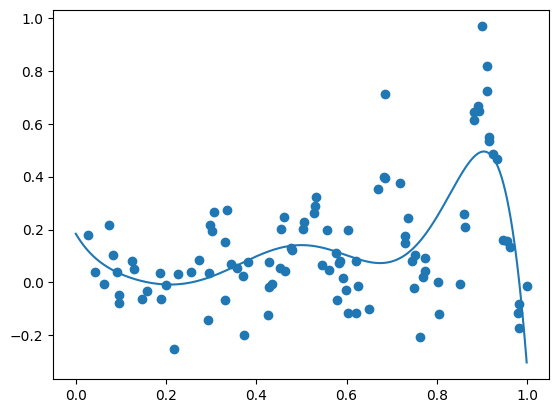

In [12]:

# plot before hand
plot(X, y, model)

>x=0.481, f()=0.139444, actual=0.069
>x=0.565, f()=0.120991, actual=0.095
>x=0.906, f()=0.494718, actual=0.731
>x=0.963, f()=0.251293, actual=-0.083
>x=0.944, f()=0.384726, actual=0.179
>x=0.063, f()=0.066643, actual=0.019
>x=0.436, f()=0.120626, actual=0.162
>x=0.902, f()=0.490556, actual=0.828
>x=0.322, f()=0.038728, actual=0.129
>x=0.901, f()=0.509509, actual=0.819
>x=0.901, f()=0.525985, actual=0.764
>x=0.901, f()=0.538010, actual=0.779
>x=0.901, f()=0.549613, actual=0.634
>x=0.837, f()=0.408542, actual=0.048
>x=0.091, f()=0.037346, actual=-0.186
>x=0.195, f()=-0.013227, actual=0.121
>x=0.166, f()=-0.002527, actual=-0.083
>x=0.877, f()=0.511377, actual=0.614
>x=0.893, f()=0.541230, actual=0.624
>x=0.903, f()=0.549977, actual=1.039
>x=0.904, f()=0.569588, actual=0.799
>x=0.617, f()=0.078238, actual=-0.180
>x=0.902, f()=0.579469, actual=0.677
>x=0.805, f()=0.297782, actual=-0.070
>x=0.927, f()=0.541575, actual=0.563
>x=0.765, f()=0.147813, actual=0.016
>x=0.702, f()=0.041343, actual=

/var/folders/9g/q_w246652jsfrgt3684zkxf40000gn/T/ipykernel_5628/1132884716.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('>x=%.3f, f()=%3f, actual=%.3f' % (x, est, actual))
/var/folders/9g/q_w246652jsfrgt3684zkxf40000gn/T/ipykernel_5628/1132884716.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('>x=%.3f, f()=%3f, actual=%.3f' % (x, est, actual))
/var/folders/9g/q_w246652jsfrgt3684zkxf40000gn/T/ipykernel_5628/1132884716.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation.

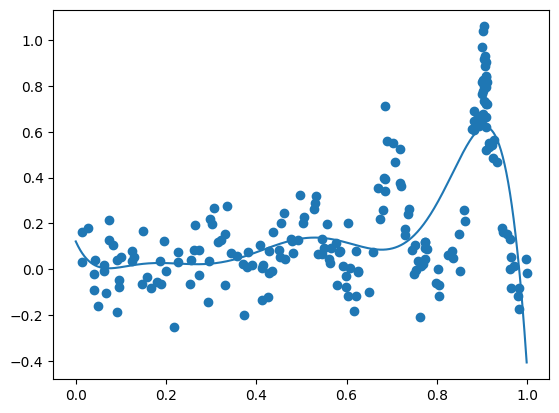

Best Result: x=0.904, y=1.060


/var/folders/9g/q_w246652jsfrgt3684zkxf40000gn/T/ipykernel_5628/1132884716.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Best Result: x=%.3f, y=%.3f' % (X[ix], y[ix]))


In [13]:


# perform the optimization process
for i in range(100):
	# select the next point to sample
	x = opt_acquisition(X, y, model)
	# sample the point
	actual = objective(x)
	# summarize the finding
	est, _ = surrogate(model, [[x]])
	print('>x=%.3f, f()=%3f, actual=%.3f' % (x, est, actual))
	# add the data to the dataset
	X = vstack((X, [[x]]))
	y = vstack((y, [[actual]]))
	# update the model
	model.fit(X, y)

# plot all samples and the final surrogate function
plot(X, y, model)
# best result
ix = argmax(y)
print('Best Result: x=%.3f, y=%.3f' % (X[ix], y[ix]))

Improvements

- Modify this version to make it accept the 15 dimensions of our input parameter (concentration of our 15 chemicals)

- Modify the acquisition function 

